# 03 Vanilla Policy Gradient with rewards to go as weights

#### 👉🏽 The policy network will have the following architecture:

<img src="https://github.com/Paulescu/hands-on-rl/blob/main/04_lunar_lander/images/policy_network.svg?raw=True" width="400"/>

#### 👉🏽 And we will use the rewards-to-go to compute the weights in the policy gradient formula.

In [70]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🚀🌙

In [71]:
ENV_NAME = 'LunarLander-v2'

## Create agent and set hyperparameters

In [72]:
from src.vpg_agent import VPGAgent

agent = VPGAgent(
    env_name=ENV_NAME,
    learning_rate=3e-3,
    hidden_layers=[64],
    gradient_weights='rewards-to-go',
)

Policy network with 836 parameters
Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=4, bias=True)
)


## Tensorboard logger to see training metrics

In [74]:
from src.utils import get_agent_id
agent_id = get_agent_id(ENV_NAME)

# tensorboard logger to see training curves
from src.utils import get_logger, get_model_path
logger = get_logger(env_name=ENV_NAME, agent_id=agent_id)

# path to save policy network weights and hyperparameters
model_path = get_model_path(env_name=ENV_NAME, agent_id=agent_id)

## Training 🏋️

In [75]:
agent.train(
    epochs=40, #4000,
    steps_per_epoch=2000,
    logger=logger,
    model_path=model_path,
)

/Users/paulabartabajo/src/online-courses/hands-on-rl/04_lunar_lander/src/vpg_agent.py:214: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  obs=torch.as_tensor(states, dtype=torch.float32),


epoch:   0 	 loss: -267.389 	 reward: -221.166
epoch:   1 	 loss: -204.377 	 reward: -192.542
epoch:   2 	 loss: -232.340 	 reward: -219.662
epoch:   3 	 loss: -171.389 	 reward: -166.934
epoch:   4 	 loss: -232.429 	 reward: -226.617
epoch:   5 	 loss: -187.156 	 reward: -162.486
epoch:   6 	 loss: -218.865 	 reward: -209.751
epoch:   7 	 loss: -212.891 	 reward: -175.319
epoch:   8 	 loss: -200.897 	 reward: -183.335
epoch:   9 	 loss: -188.937 	 reward: -162.320


100%|███████████████████████████████████| 100/100 [00:03<00:00, 30.02it/s]


Best model! Average reward = -161.87
epoch:  10 	 loss: -169.608 	 reward: -146.375
epoch:  11 	 loss: -199.259 	 reward: -180.956
epoch:  12 	 loss: -143.241 	 reward: -124.866
epoch:  13 	 loss: -223.725 	 reward: -203.871
epoch:  14 	 loss: -157.804 	 reward: -132.611
epoch:  15 	 loss: -149.386 	 reward: -133.520
epoch:  16 	 loss: -174.216 	 reward: -143.243
epoch:  17 	 loss: -232.740 	 reward: -211.628
epoch:  18 	 loss: -143.497 	 reward: -131.429
epoch:  19 	 loss: -168.803 	 reward: -151.781


100%|███████████████████████████████████| 100/100 [00:04<00:00, 24.34it/s]


Best model! Average reward = -145.97
epoch:  20 	 loss: -149.743 	 reward: -137.748
epoch:  21 	 loss: -150.779 	 reward: -141.405
epoch:  22 	 loss: -134.164 	 reward: -115.323
epoch:  23 	 loss: -148.877 	 reward: -134.971
epoch:  24 	 loss: -100.775 	 reward: -118.940
epoch:  25 	 loss: -163.278 	 reward: -140.844
epoch:  26 	 loss: -146.107 	 reward: -124.354
epoch:  27 	 loss: -178.851 	 reward: -159.094
epoch:  28 	 loss: -154.667 	 reward: -136.591
epoch:  29 	 loss: -156.719 	 reward: -137.999


100%|███████████████████████████████████| 100/100 [00:03<00:00, 31.92it/s]


Best model! Average reward = -141.00
epoch:  30 	 loss: -170.340 	 reward: -150.000
epoch:  31 	 loss: -137.711 	 reward: -118.168
epoch:  32 	 loss: -164.256 	 reward: -150.499
epoch:  33 	 loss: -166.857 	 reward: -143.036
epoch:  34 	 loss: -136.756 	 reward: -122.145
epoch:  35 	 loss: -161.233 	 reward: -146.427
epoch:  36 	 loss: -152.089 	 reward: -132.019
epoch:  37 	 loss: -163.913 	 reward: -138.266
epoch:  38 	 loss: -179.907 	 reward: -164.148
epoch:  39 	 loss: -140.456 	 reward: -123.725


100%|███████████████████████████████████| 100/100 [00:03<00:00, 33.08it/s]

Best model! Average reward = -137.36


## Evaluate the agent ⏱️

In [91]:
rewards, steps = agent.evaluate(n_episodes=100)

100%|████████████████████████| 100/100 [00:23<00:00,  4.30it/s]


### Average reward

In [92]:
import numpy as np
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 236.12, std 76.28


## Reward distribution

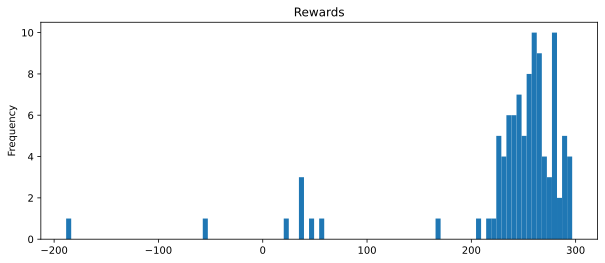

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

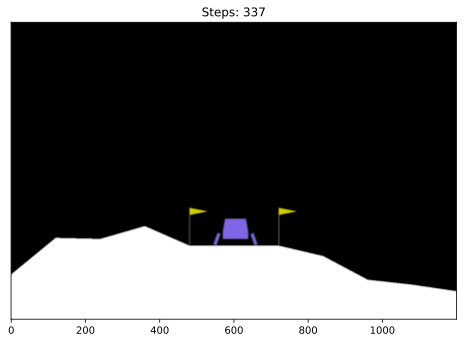

In [94]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01, seed=12345)